In [1]:
#Importing the necessary libraries

import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing

In [2]:
#Load CSV

# The first column is an index. We will duplicate this and create a column without it
df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D208\D208 PA Submission\Starting Datasets\Churn/churn_clean.csv', index_col=0)

In [3]:
#Preview loaded data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
#Check for duplicates

df.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [5]:
#Show number of duplicates. False = no duplicates 

print(df.duplicated().value_counts())

False    10000
dtype: int64


In [6]:
#Count of null/missing values in each column

df.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

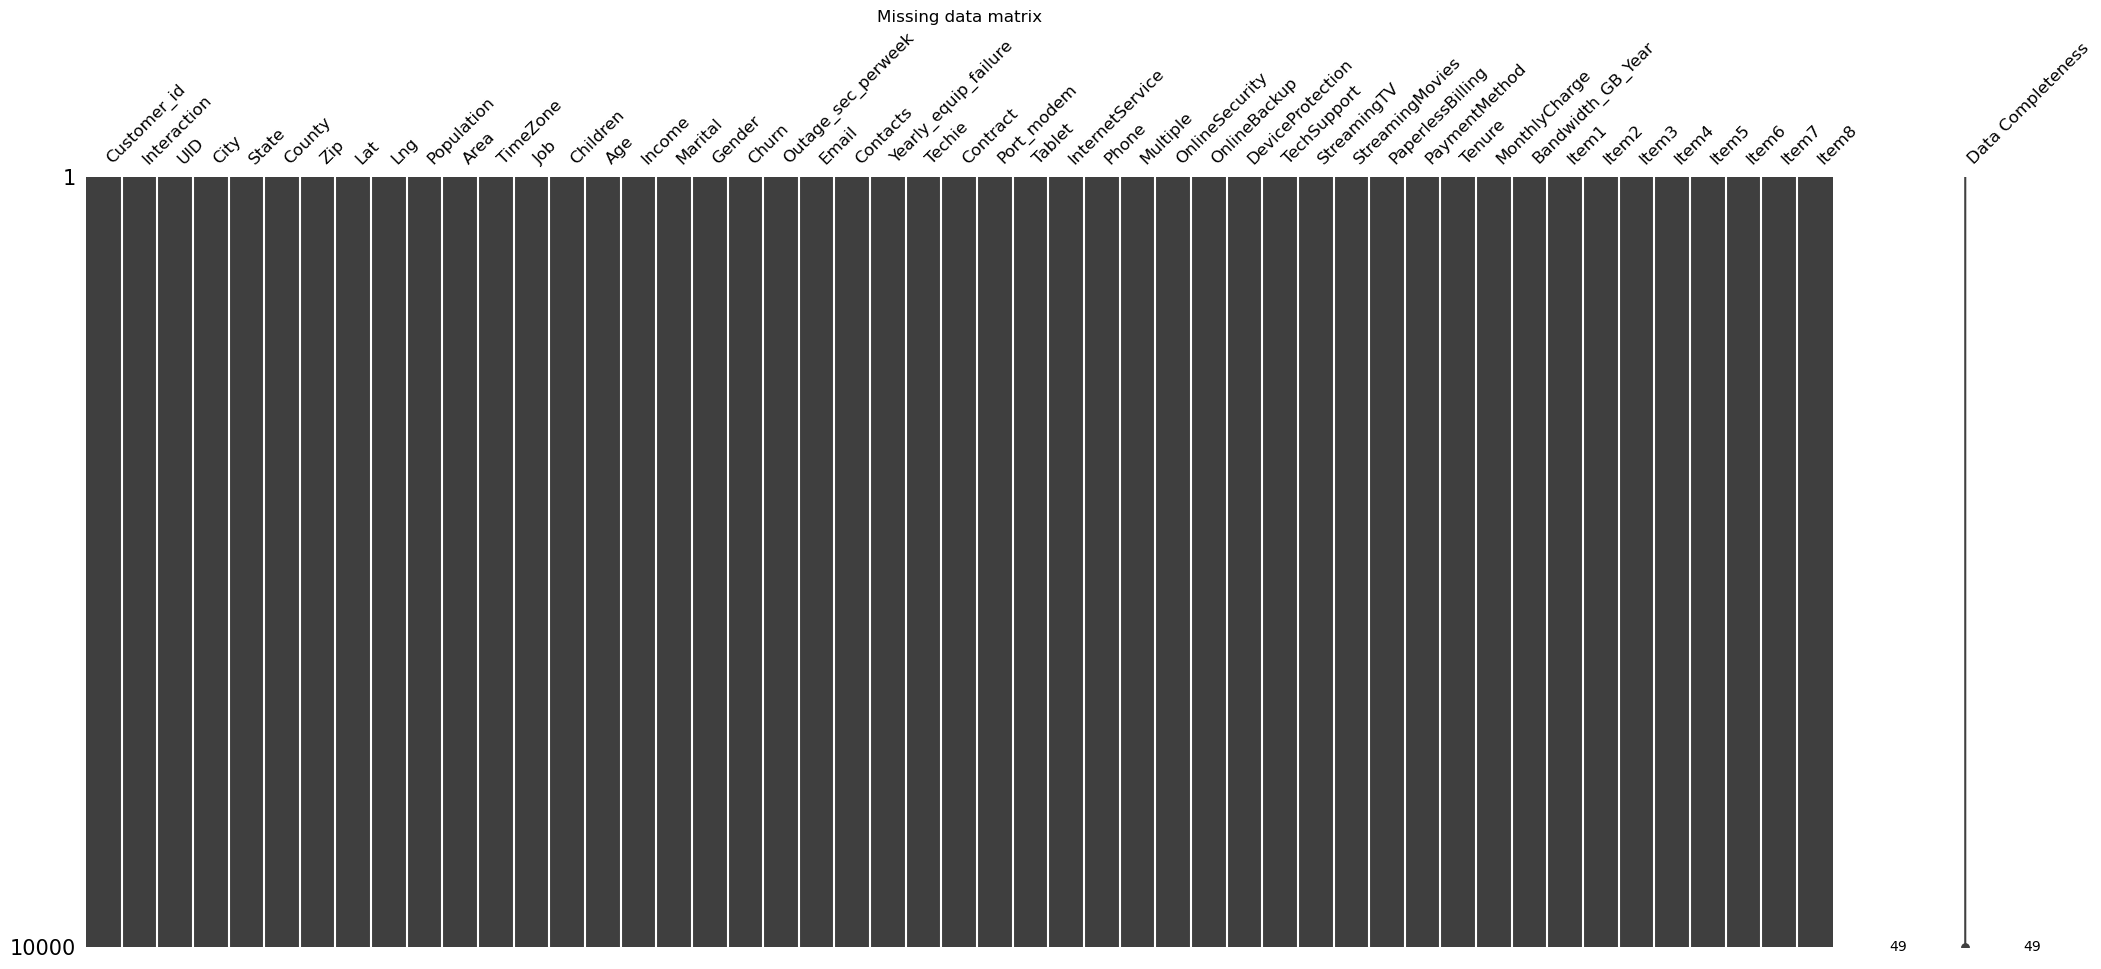

In [7]:
#Import missingno to visualize missing/null values 

import missingno as msno
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing data matrix')
plt.show()


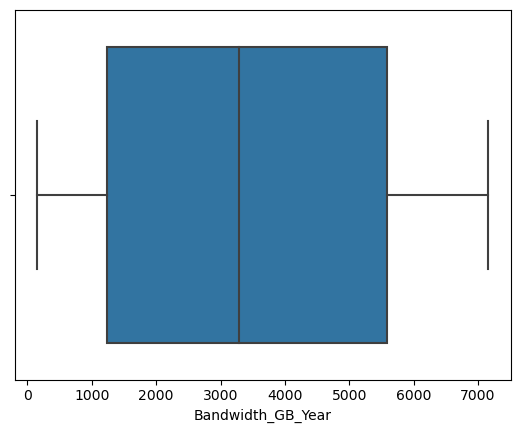

In [8]:
#Outlier check with boxplot on dependent variable 'Bandwidth_GB_Year'

boxplot=sns.boxplot(x='Bandwidth_GB_Year',data=df)

In [9]:
#Calculate Z-score for 'Bandwidth_GB_Year'

df['Z_Score_Bandwidth_GB_Year']=stats.zscore(df['Bandwidth_GB_Year'])
df[['Bandwidth_GB_Year','Z_Score_Bandwidth_GB_Year']].head(40)

Bandwidth_GB_Year  Z_Score_Bandwidth_GB_Year
CaseOrder                                              
1                 904.536110                  -1.138487
2                 800.982766                  -1.185876
3                2054.706961                  -0.612138
4                2164.579412                  -0.561857
5                 271.493436                  -1.428184
6                1039.357983                  -1.076789
7                1907.242972                  -0.679621
8                 979.612708                  -1.104130
9                1312.874964                  -0.951620
10                508.763791                  -1.319603
11               2728.767869                  -0.303669
12               1180.588788                  -1.012158
13               1196.388018                  -1.004928
14               1948.694497                  -0.660652
15               1582.295235                  -0.828326
16               1840.014467                  -0.710387
17               2070.376729                  -0.604967
18                882.098593                  -1.148755
19               1833.096700                  -0.713553
20               1954.080809                  -0.658187
21               2330.319383                  -0.486010
22                594.105428                  -1.280548
23                713.063309                  -1.226110
24                945.380293                  -1.119796
25                870.763980                  -1.153942
26                774.293707                  -1.198089
27               1506.446527                  -0.863037
28                419.050871                  -1.360658
29               1259.415493                  -0.976085
30               1745.125956                  -0.753810
31               1795.465729                  -0.730774
32                492.477147                  -1.327056
33               1013.993166                  -1.088397
34               2680.762173                  -0.325638
35               1081.814362                  -1.057360
36               1209.961168                  -0.998716
37                897.591914                  -1.141665
38               1340.930156                  -0.938781
39               1113.993679                  -1.042634
40               1530.107690                  -0.852209

In [10]:
#Print number of outliers based on z-score for 'Bandwidth_GB_Year'

df_outliers = df.query('(Z_Score_Bandwidth_GB_Year > 3) | (Z_Score_Bandwidth_GB_Year < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Bandwidth_GB_Year'].to_dict().values())

Number of outliers: 0
Outlier values: dict_values([])


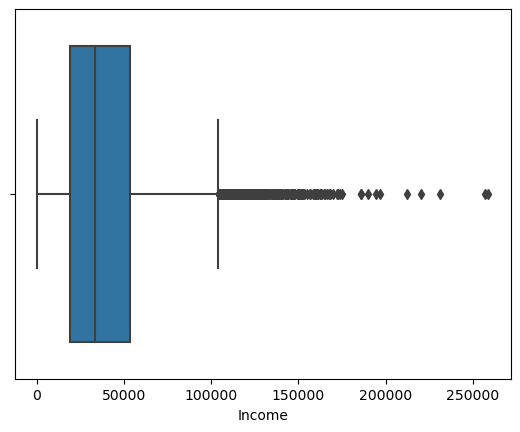

In [11]:
#Outlier check with boxplot on independent variable 'Income'


boxplot=sns.boxplot(x='Income',data=df)

In [12]:
#Calculate Z-score for 'Income'

df['Z_Score_Income']=stats.zscore(df['Income'])
df[['Income','Z_Score_Income']].head(40)

Income  Z_Score_Income
CaseOrder                           
1           28561.99       -0.398778
2           21704.77       -0.641954
3            9609.57       -1.070885
4           18925.23       -0.740525
5           40074.19        0.009478
6           22660.20       -0.608072
7           11467.50       -1.004997
8           26759.64       -0.462694
9           58634.51        0.667680
10          50231.40        0.369682
11          22580.70       -0.610891
12          18342.12       -0.761204
13          83671.08        1.555549
14         115114.57        2.670625
15          64256.81        0.867063
16          89061.45        1.746707
17          31659.30       -0.288938
18          44142.81        0.153763
19          39262.14       -0.019320
20          19494.75       -0.720328
21          39624.21       -0.006480
22          45714.47        0.209498
23          27442.03       -0.438495
24          79699.62        1.414709
25          28520.32       -0.400255
26          12558.83       -0.966296
27           8762.23       -1.100934
28          43882.72        0.144539
29          10482.52       -1.039928
30          33442.79       -0.225691
31          43383.54        0.126837
32          21793.88       -0.638794
33          51960.51        0.431001
34          25942.10       -0.491687
35          11211.59       -1.014073
36           8283.29       -1.117919
37          10114.81       -1.052968
38          36229.21       -0.126876
39          25397.44       -0.511002
40          50336.50        0.373409

In [13]:
#Print number of outliers based on z-score for 'Income'

df_outliers = df.query('(Z_Score_Income > 3) | (Z_Score_Income < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Income'].to_dict().values())
print("min=",min(df_outliers['Income']))
print("max=",max(df_outliers['Income']))

Number of outliers: 145
Outlier values: dict_values([132116.33, 125814.88, 135727.71, 156740.67, 146494.7, 159315.5, 163086.24, 172884.11, 169580.73, 168097.1, 125002.34, 132139.98, 131500.47, 186035.04, 154718.85, 126236.18, 162360.14, 132334.77, 135171.31, 126457.41, 149502.87, 165151.02, 147436.94, 152172.92, 137589.2, 127881.0, 146782.3, 137119.7, 143972.7, 143217.5, 134691.3, 142650.5, 128114.3, 138555.9, 175137.3, 131511.8, 152131.7, 146951.6, 145163.1, 145569.5, 129628.7, 160589.2, 167566.6, 159113.5, 149959.8, 142086.1, 125660.1, 138122.3, 125769.6, 152972.9, 147682.0, 172372.2, 131265.4, 128906.6, 138723.0, 128728.3, 166553.1, 139474.8, 189938.4, 129473.6, 149968.0, 126678.4, 124493.2, 125288.6, 258900.7, 130732.2, 134838.8, 156571.0, 143794.0, 133161.6, 162842.8, 129137.2, 151312.2, 135891.8, 146518.2, 152813.5, 141362.6, 131834.1, 124735.8, 131647.5, 160862.9, 220383.0, 130048.4, 135516.9, 151181.8, 161251.0, 212255.3, 125041.1, 137978.3, 131680.1, 167846.0, 132149.5, 129787

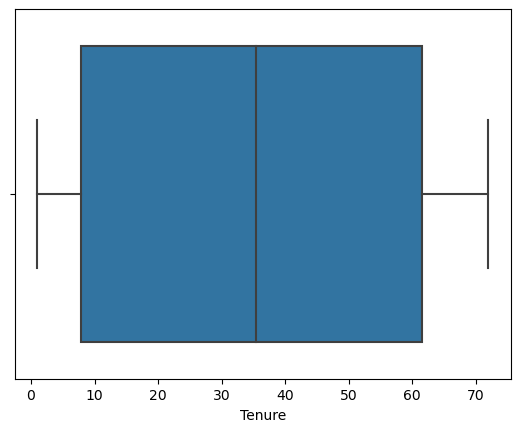

In [14]:
#Outlier check with boxplot on independent variable 'Tenure'

boxplot=sns.boxplot(x='Tenure',data=df)

In [15]:
#Calculate Z-score for 'Tenure'

df['Z_Score_Tenure']=stats.zscore(df['Tenure'])
df[['Tenure','Z_Score_Tenure']].head(40)

Tenure  Z_Score_Tenure
CaseOrder                           
1           6.795513       -1.048746
2           1.156681       -1.262001
3          15.754144       -0.709940
4          17.087227       -0.659524
5           1.670972       -1.242551
6           7.000994       -1.040975
7          13.236774       -0.805144
8           4.264255       -1.144476
9           8.220686       -0.994848
10          3.422086       -1.176326
11         19.267262       -0.577077
12         10.521998       -0.907814
13         13.011492       -0.813664
14         16.879220       -0.667391
15         10.060199       -0.925279
16         13.870013       -0.781196
17         15.782150       -0.708881
18          2.303331       -1.218636
19         17.109956       -0.658664
20         12.806158       -0.821430
21         20.453910       -0.532199
22          2.415992       -1.214375
23          6.652299       -1.054162
24          8.543717       -0.982631
25          5.770390       -1.087515
26          4.157659       -1.148507
27         10.405661       -0.912214
28          1.392422       -1.253086
29          1.430386       -1.251650
30          5.425865       -1.100545
31         11.082878       -0.886602
32          3.586185       -1.170120
33          4.727388       -1.126961
34         20.899234       -0.515358
35          3.471330       -1.174463
36          5.478588       -1.098551
37          3.312992       -1.180452
38          7.161562       -1.034903
39          9.847563       -0.933321
40         16.042022       -0.699053

In [16]:
#Print number of outliers based on z-score for 'Tenure'

df_outliers = df.query('(Z_Score_Tenure > 3) | (Z_Score_Tenure < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Tenure'].to_dict().values())

Number of outliers: 0
Outlier values: dict_values([])


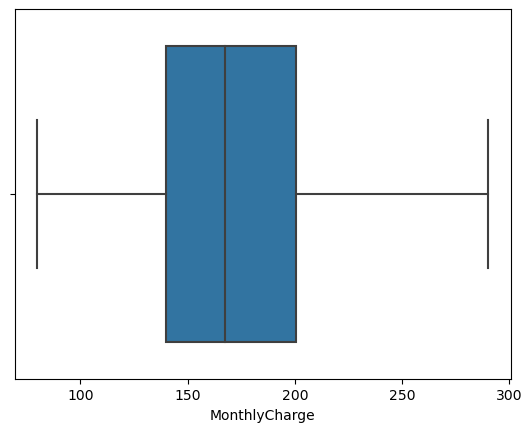

In [17]:
#Outlier check with boxplot on independent variable 'MonthlyCharge'

boxplot=sns.boxplot(x='MonthlyCharge',data=df)

In [18]:
#Calculate Z-score for 'MonthlyCharge'

df['Z_Score_MonthlyCharge']=stats.zscore(df['MonthlyCharge'])
df[['MonthlyCharge','Z_Score_MonthlyCharge']].head(40)

MonthlyCharge  Z_Score_MonthlyCharge
CaseOrder                                      
1             172.455519              -0.003943
2             242.632554               1.630326
3             159.947583              -0.295225
4             119.956840              -1.226521
5             149.948316              -0.528086
6             185.007692               0.288370
7             200.118516               0.640268
8             114.950905              -1.343098
9             117.468591              -1.284467
10            162.482694              -0.236188
11            174.958118               0.054337
12            149.962093              -0.527765
13            137.439154              -0.819397
14            184.971516               0.287527
15            159.965581              -0.294806
16            177.650760               0.117043
17            194.966286               0.520284
18            202.682861               0.699986
19            152.490739              -0.468878
20            149.944668              -0.528171
21            184.978458               0.287689
22            127.495766              -1.050956
23            124.964303              -1.109908
24            149.948316              -0.528086
25            162.511928              -0.235507
26             92.455141              -1.866975
27            222.649979               1.164976
28            139.981577              -0.760189
29            200.132293               0.640589
30            257.651257               1.980078
31            230.105118               1.338590
32            147.489301              -0.585351
33            230.105118               1.338590
34            174.958118               0.054337
35            267.664655               2.213268
36            162.483267              -0.236174
37            229.993134               1.335982
38            140.001280              -0.759730
39            184.964681               0.287368
40            147.473844              -0.585711

In [19]:
#Print number of outliers based on z-score for 'MonthlyCharge'

df_outliers = df.query('(Z_Score_MonthlyCharge > 3) | (Z_Score_MonthlyCharge < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['MonthlyCharge'].to_dict().values())


Number of outliers: 0
Outlier values: dict_values([])


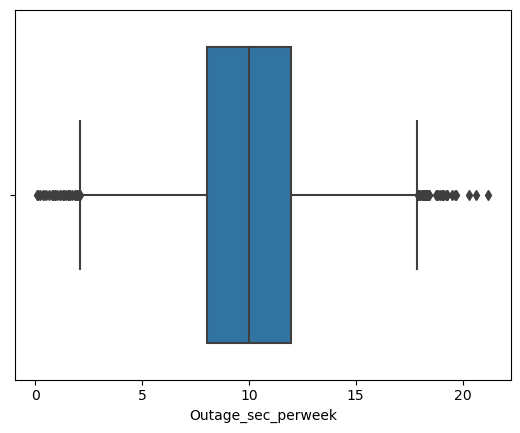

In [20]:
#Outlier check with boxplot on independent variable 'Outage_sec_perweek'

boxplot=sns.boxplot(x='Outage_sec_perweek',data=df)

In [21]:
#Calculate Z-score for 'Outage_sec_perweek'

df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])
df[['Outage_sec_perweek','Z_Score_Outage_sec_perweek']].head(40)

Outage_sec_perweek  Z_Score_Outage_sec_perweek
CaseOrder                                                
1                    7.978323                   -0.679978
2                   11.699080                    0.570331
3                   10.752800                    0.252347
4                   14.913540                    1.650506
5                    8.147417                   -0.623156
6                    8.420993                   -0.531225
7                   11.182725                    0.396817
8                    7.791632                   -0.742712
9                    5.739006                   -1.432469
10                   8.707824                   -0.434839
11                   9.341632                   -0.221857
12                   6.680826                   -1.115983
13                   8.273875                   -0.580661
14                   5.880566                   -1.384900
15                  11.790730                    0.601129
16                  10.798470                    0.267694
17                  13.522847                    1.183183
18                   9.831167                   -0.057355
19                   9.574706                   -0.143535
20                  10.922461                    0.309359
21                  12.068892                    0.694601
22                   6.984820                   -1.013831
23                   9.372976                   -0.211324
24                   7.109003                   -0.972101
25                  13.747780                    1.258768
26                   9.767668                   -0.078693
27                  15.862609                    1.969428
28                  14.736166                    1.590902
29                  13.435580                    1.153858
30                  10.617711                    0.206952
31                   6.613071                   -1.138752
32                   4.450172                   -1.865564
33                   8.774647                   -0.412384
34                  11.131567                    0.379626
35                   5.540789                   -1.499077
36                  13.803627                    1.277535
37                  16.310171                    2.119824
38                   9.447065                   -0.186427
39                  16.841008                    2.298205
40                   7.972937                   -0.681787

In [22]:
#Print number of outliers based on z-score for 'Outage_sec_perweek'

df_outliers = df.query('(Z_Score_Outage_sec_perweek > 3) | (Z_Score_Outage_sec_perweek < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Outage_sec_perweek'].to_dict().values())
print("min=",min(df_outliers['Outage_sec_perweek']))
print("max=",max(df_outliers['Outage_sec_perweek']))

Number of outliers: 28
Outlier values: dict_values([19.07180624, 19.08168517, 0.760277434, 19.2677815, 18.94289163, 0.120057716, 0.636607948, 0.5073749, 19.50058, 20.30462, 0.9952896, 0.2322795, 0.9003326, 21.20723, 0.3550483, 19.26111, 0.826998, 19.71756, 20.62504, 19.01962, 0.9403304, 0.3918659, 19.10781, 0.09974694, 19.65711, 19.01629, 19.20969, 0.827544])
min= 0.09974694
max= 21.20723


0.005085833751439165


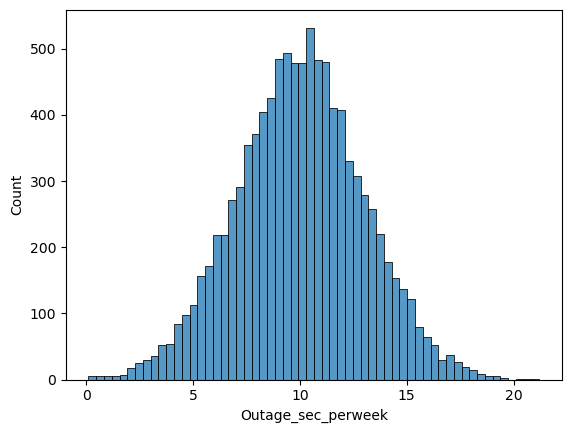

In [23]:
#Plot for 'Outage_sec_perweek' Distribution with Seaborn
sns.histplot(df['Outage_sec_perweek'])

#Annotate skewness
from scipy.stats import skew 
print(skew(df['Outage_sec_perweek'], axis=0,))

plt.show()

#Outliers will be kept. Distribution appears normal 

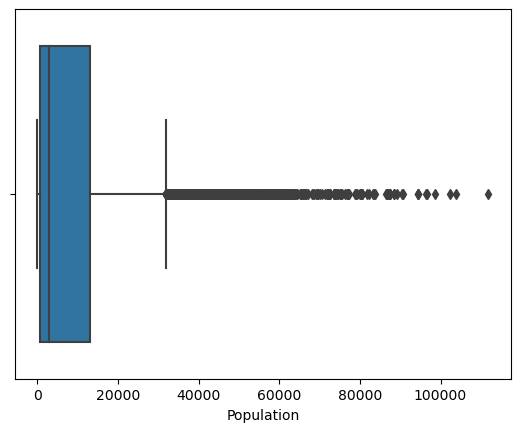

In [24]:
#Outlier check with boxplot on independent variable 'Population'

boxplot=sns.boxplot(x='Population',data=df)

In [25]:
#Calculate Z-score for 'Population'

df['Z_Score_Population']=stats.zscore(df['Population'])
df[['Population','Z_Score_Population']].head(40)

Population  Z_Score_Population
CaseOrder                                
1                  38           -0.673405
2               10446            0.047772
3                3735           -0.417238
4               13863            0.284537
5               11352            0.110549
6               17701            0.550475
7                2535           -0.500386
8               23144            0.927623
9               17351            0.526223
10              20193            0.723147
11                555           -0.637582
12              33372            1.636327
13                556           -0.637512
14                  0           -0.676038
15               8165           -0.110280
16               2093           -0.531013
17              50079            2.793965
18               7249           -0.173750
19               9463           -0.020341
20               3177           -0.455902
21                 69           -0.671257
22              14440            0.324518
23                381           -0.649638
24               2193           -0.524084
25               9434           -0.022351
26              29568            1.372746
27               3089           -0.461999
28               5652           -0.284407
29               1716           -0.557135
30              52484            2.960609
31              11268            0.104728
32               1765           -0.553740
33                680           -0.628920
34                136           -0.666614
35               1517           -0.570924
36              14103            0.301167
37               6394           -0.232994
38               5059           -0.325497
39              20450            0.740954
40               2123           -0.528934

In [26]:
#Print number of outliers based on z-score for 'Population'

df_outliers = df.query('(Z_Score_Population > 3) | (Z_Score_Population < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Population'].to_dict().values())
print("min=",min(df_outliers['Population']))
print("max=",max(df_outliers['Population']))

Number of outliers: 219
Outlier values: dict_values([58431, 55519, 55122, 86926, 90517, 62430, 57344, 61045, 88349, 56959, 74971, 63318, 61572, 54150, 53140, 57511, 76973, 61509, 55652, 57642, 60461, 57955, 79276, 66531, 87240, 53364, 56765, 69142, 89075, 57800, 58129, 56284, 64417, 98660, 53431, 59191, 64417, 59586, 94395, 54829, 54621, 81789, 72332, 55222, 72592, 94512, 76819, 58123, 54023, 54023, 56308, 62429, 62131, 71763, 56446, 54190, 80555, 61045, 65123, 57181, 54081, 60408, 55215, 76177, 58705, 66053, 59556, 53098, 56406, 74971, 55623, 74601, 80489, 57955, 62382, 56790, 68676, 63393, 54464, 57658, 79996, 73671, 53552, 53364, 63659, 56642, 90675, 62491, 73671, 69589, 57886, 60033, 55857, 57775, 68300, 60944, 66056, 62135, 55352, 63911, 63465, 56308, 63425, 75635, 83615, 59609, 68128, 58673, 61850, 71360, 57181, 58160, 60270, 67053, 83179, 80489, 59009, 53886, 63218, 66583, 54601, 65347, 62274, 88344, 63884, 56641, 59482, 82257, 53364, 73671, 70614, 80264, 57306, 66053, 102433, 7

2.204676831000107


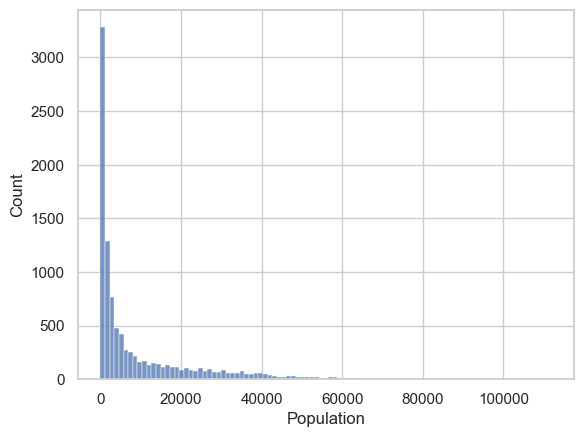

In [27]:
# Set the style of seaborn
sns.set(style='whitegrid')

#Plot for 'Population' Distribution
sns.histplot(df['Population'])

#Annotate skewness
from scipy.stats import skew 
print(skew(df['Population'], axis=0,))

plt.show()

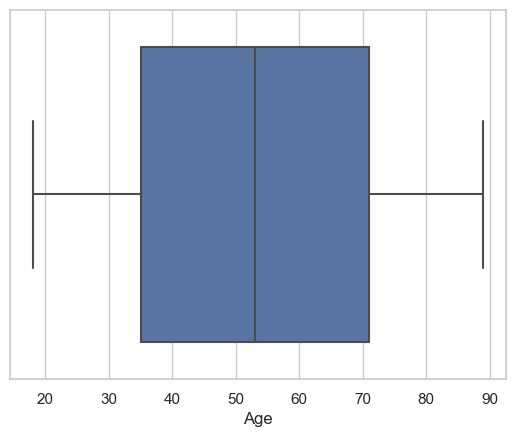

In [28]:
#Outlier check with boxplot on independent variable 'Age'

boxplot=sns.boxplot(x='Age',data=df)

In [29]:
#Calculate Z-score for 'Age'

df['Z_Score_Age']=stats.zscore(df['Age'])
df[['Age','Z_Score_Age']].head(40)

Age  Z_Score_Age
CaseOrder                  
1           68     0.720925
2           27    -1.259957
3           50    -0.148730
4           48    -0.245359
5           83     1.445638
6           83     1.445638
7           79     1.252381
8           30    -1.115015
9           49    -0.197045
10          86     1.590581
11          23    -1.453214
12          56     0.141155
13          83     1.445638
14          29    -1.163329
15          30    -1.115015
16          39    -0.680187
17          63     0.479354
18          60     0.334412
19          61     0.382726
20          23    -1.453214
21          38    -0.728501
22          30    -1.115015
23          52    -0.052102
24          68     0.720925
25          75     1.059125
26          77     1.155753
27          47    -0.293673
28          70     0.817554
29          20    -1.598157
30          69     0.769239
31          45    -0.390301
32          40    -0.631872
33          82     1.397324
34          74     1.010810
35          69     0.769239
36          52    -0.052102
37          26    -1.308271
38          25    -1.356586
39          66     0.624297
40          72     0.914182

In [30]:
#Print number of outliers based on z-score for 'Age'

df_outliers = df.query('(Z_Score_Age > 3) | (Z_Score_Age < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Age'].to_dict().values())

Number of outliers: 0
Outlier values: dict_values([])


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_id                 10000 non-null  object 
 1   Interaction                 10000 non-null  object 
 2   UID                         10000 non-null  object 
 3   City                        10000 non-null  object 
 4   State                       10000 non-null  object 
 5   County                      10000 non-null  object 
 6   Zip                         10000 non-null  int64  
 7   Lat                         10000 non-null  float64
 8   Lng                         10000 non-null  float64
 9   Population                  10000 non-null  int64  
 10  Area                        10000 non-null  object 
 11  TimeZone                    10000 non-null  object 
 12  Job                         10000 non-null  object 
 13  Children                    100

In [32]:
#Summary statistics for dependent variable and independent variables BEFORE outlier treatment

In [33]:
df.Bandwidth_GB_Year.describe() 

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [34]:
df.Income.describe() 

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [35]:
df.Tenure.describe() 

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [36]:
df.MonthlyCharge.describe() 

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [37]:
df.Outage_sec_perweek.describe() 

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [38]:
df.Population.describe() 

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [39]:
df.Age.describe() 

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [40]:
df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [41]:
df.Area.value_counts()

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

In [42]:
df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [43]:
df.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [44]:
df.Techie.value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [45]:
df.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [46]:
#Create new dataframe
regression_df = df[['Bandwidth_GB_Year', 'InternetService', 'Area', 'Contract', 'Churn', 'Techie', 'TechSupport', 'Income', 'Tenure', 'MonthlyCharge', 'Outage_sec_perweek', 'Population', 'Age']]

regression_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bandwidth_GB_Year   10000 non-null  float64
 1   InternetService     10000 non-null  object 
 2   Area                10000 non-null  object 
 3   Contract            10000 non-null  object 
 4   Churn               10000 non-null  object 
 5   Techie              10000 non-null  object 
 6   TechSupport         10000 non-null  object 
 7   Income              10000 non-null  float64
 8   Tenure              10000 non-null  float64
 9   MonthlyCharge       10000 non-null  float64
 10  Outage_sec_perweek  10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Age                 10000 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 1.1+ MB


In [47]:
#Univariate & Bivariate Distributions



In [48]:
#Set Seaborn Color

color = sns.color_palette("Blues")[4]

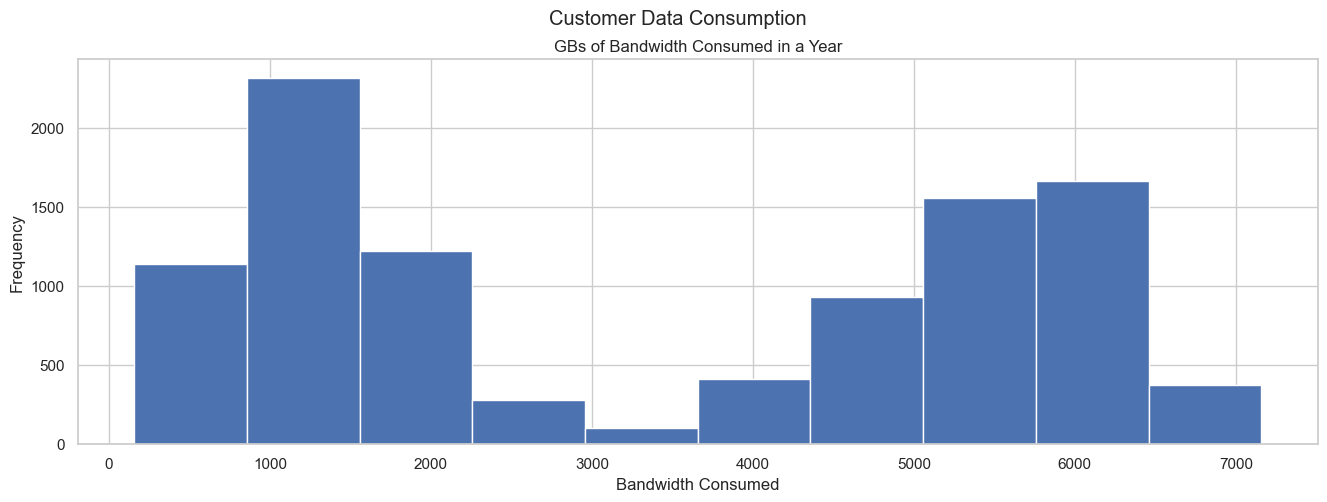

In [49]:
#Univariate Distribution of dependent variable 'Bandwidth_GB_Year'

plt.figure(figsize = [16,5])
plt.suptitle('Customer Data Consumption')
plt.title('GBs of Bandwidth Consumed in a Year')
plt.hist(regression_df['Bandwidth_GB_Year'])
plt.xlabel('Bandwidth Consumed')
plt.ylabel('Frequency');
plt.show()


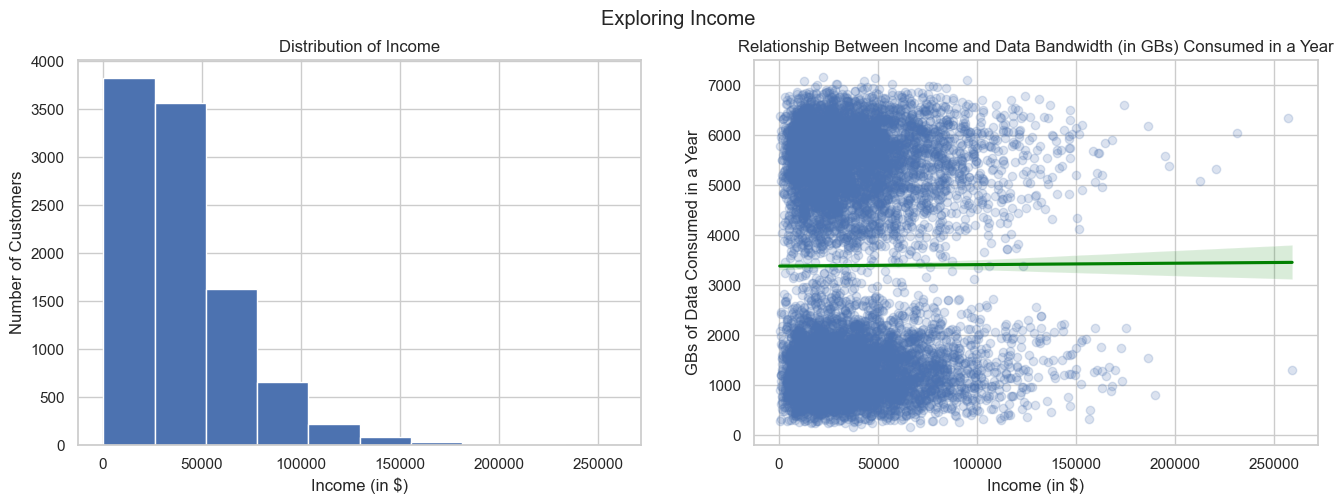

In [50]:
#Plots of Independent Variable 'Income' vs Dependent Variable 'Bandwidth_GB_Year'

plt.figure(figsize = [16,5])
plt.suptitle('Exploring Income')

# LEFT plot: Univariate exploration of Income
plt.subplot(1, 2, 1)
plt.title('Distribution of Income')
plt.hist(data=regression_df, x='Income')
plt.xlabel('Income (in $)')
plt.ylabel('Number of Customers');



# RIGHT plot: Bivariate exploration of Income vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
plt.title('Relationship Between Income and Data Bandwidth (in GBs) Consumed in a Year')
sns.regplot(data=regression_df, x='Income', y='Bandwidth_GB_Year', 
                scatter_kws={'alpha':0.2}, line_kws={"color": "green"})
plt.xlabel('Income (in $)')
plt.ylabel('GBs of Data Consumed in a Year');




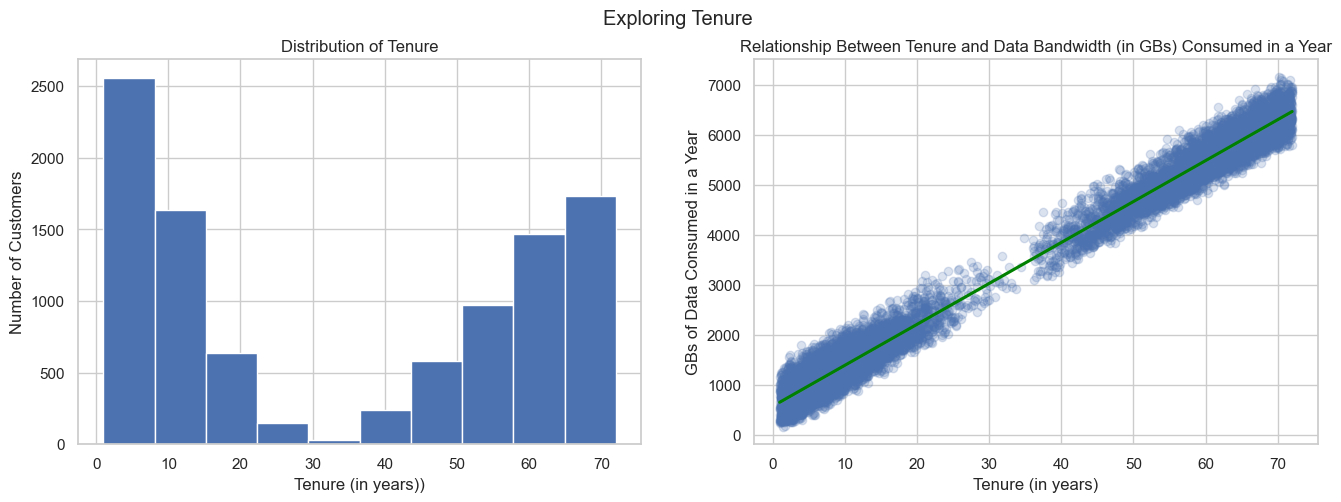

In [51]:
#Plots of Independent Variable 'Tenure' vs Dependent Variable 'Bandwidth_GB_Year'

plt.figure(figsize = [16,5])
plt.suptitle('Exploring Tenure')

# LEFT plot: Univariate exploration of Tenure
plt.subplot(1, 2, 1)
plt.title('Distribution of Tenure')
plt.hist(data=regression_df, x='Tenure')
plt.xlabel('Tenure (in years))')
plt.ylabel('Number of Customers');



# RIGHT plot: Bivariate exploration of Tenure vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
plt.title('Relationship Between Tenure and Data Bandwidth (in GBs) Consumed in a Year')
sns.regplot(data=regression_df, x='Tenure', y='Bandwidth_GB_Year', 
                scatter_kws={'alpha':0.2}, line_kws={"color": "green"})
plt.xlabel('Tenure (in years)')
plt.ylabel('GBs of Data Consumed in a Year');


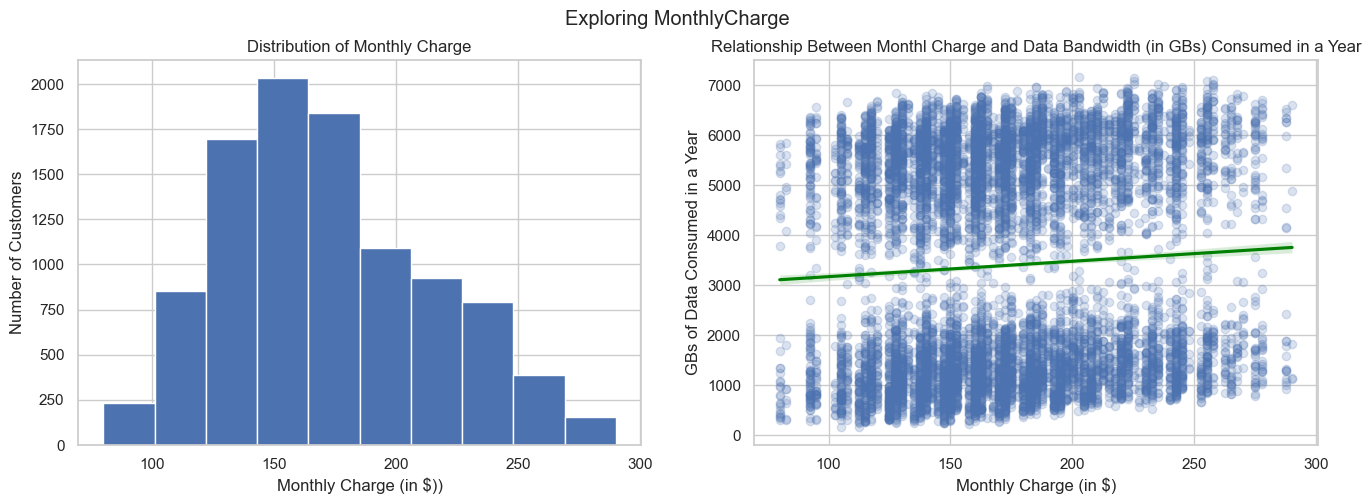

In [52]:
#Plots of Independent Variable 'MonthlyCharge' vs Dependent Variable 'Bandwidth_GB_Year'

plt.figure(figsize = [16,5])
plt.suptitle('Exploring MonthlyCharge')

# LEFT plot: Univariate exploration of MonthlyCharge
plt.subplot(1, 2, 1)
plt.title('Distribution of Monthly Charge')
plt.hist(data=regression_df, x='MonthlyCharge')
plt.xlabel('Monthly Charge (in $))')
plt.ylabel('Number of Customers');



# RIGHT plot: Bivariate exploration of MonthlyCharge vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
plt.title('Relationship Between Monthl Charge and Data Bandwidth (in GBs) Consumed in a Year')
sns.regplot(data=regression_df, x='MonthlyCharge', y='Bandwidth_GB_Year', 
                scatter_kws={'alpha':0.2}, line_kws={"color": "green"})
plt.xlabel('Monthly Charge (in $)')
plt.ylabel('GBs of Data Consumed in a Year');


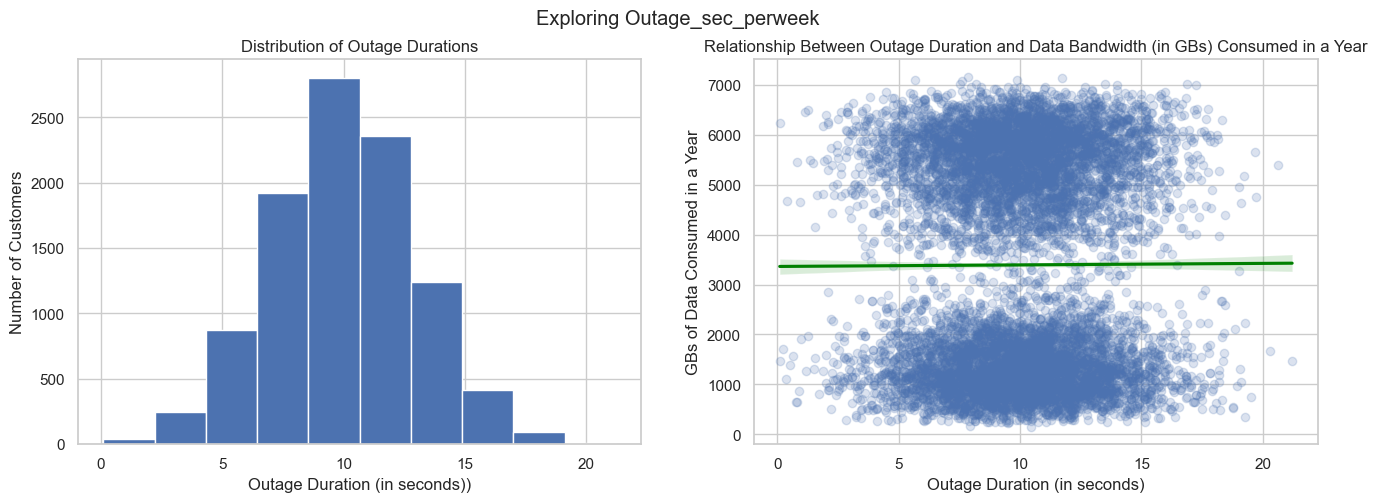

In [53]:
#Plots of Independent Variable 'Outage_sec_perweek' vs Dependent Variable 'Bandwidth_GB_Year'

plt.figure(figsize = [16,5])
plt.suptitle('Exploring Outage_sec_perweek')

# LEFT plot: Univariate exploration of Outage_sec_perweek
plt.subplot(1, 2, 1)
plt.title('Distribution of Outage Durations')
plt.hist(data=regression_df, x='Outage_sec_perweek')
plt.xlabel('Outage Duration (in seconds))')
plt.ylabel('Number of Customers');



# RIGHT plot: Bivariate exploration of Outage_sec_perweek vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
plt.title('Relationship Between Outage Duration and Data Bandwidth (in GBs) Consumed in a Year')
sns.regplot(data=regression_df, x='Outage_sec_perweek', y='Bandwidth_GB_Year', 
                scatter_kws={'alpha':0.2}, line_kws={"color": "green"})
plt.xlabel('Outage Duration (in seconds)')
plt.ylabel('GBs of Data Consumed in a Year');


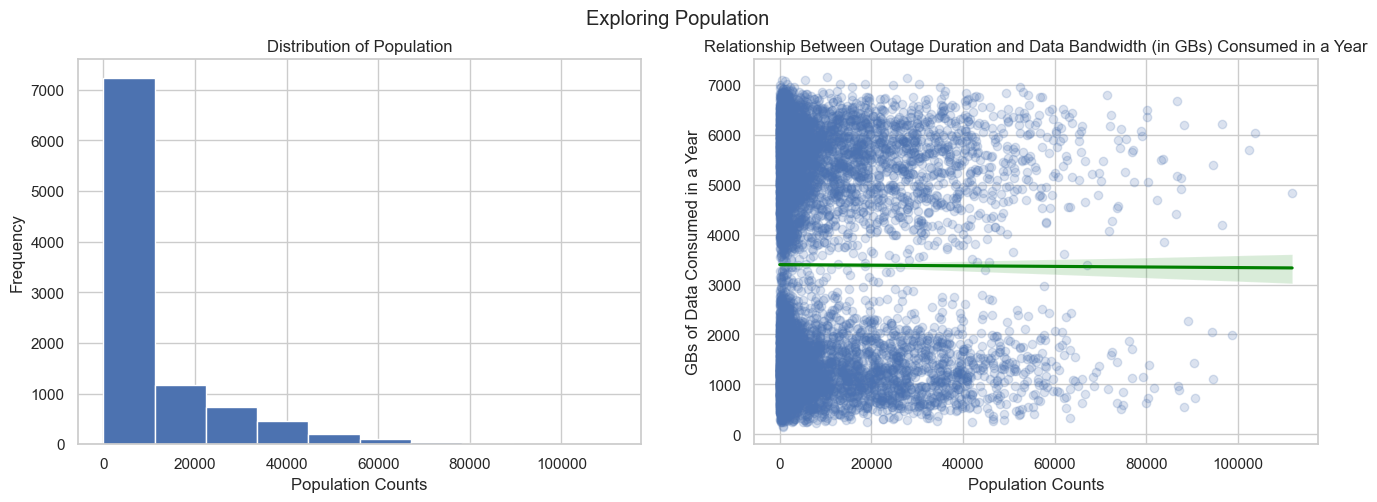

In [54]:
#Plots of Independent Variable 'Population' vs Dependent Variable 'Bandwidth_GB_Year'

plt.figure(figsize = [16,5])
plt.suptitle('Exploring Population')

# LEFT plot: Univariate exploration of Population
plt.subplot(1, 2, 1)
plt.title('Distribution of Population')
plt.hist(data=regression_df, x='Population')
plt.xlabel('Population Counts')
plt.ylabel('Frequency');



# RIGHT plot: Bivariate exploration of Population vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
plt.title('Relationship Between Outage Duration and Data Bandwidth (in GBs) Consumed in a Year')
sns.regplot(data=regression_df, x='Population', y='Bandwidth_GB_Year', 
                scatter_kws={'alpha':0.2}, line_kws={"color": "green"})
plt.xlabel('Population Counts')
plt.ylabel('GBs of Data Consumed in a Year');

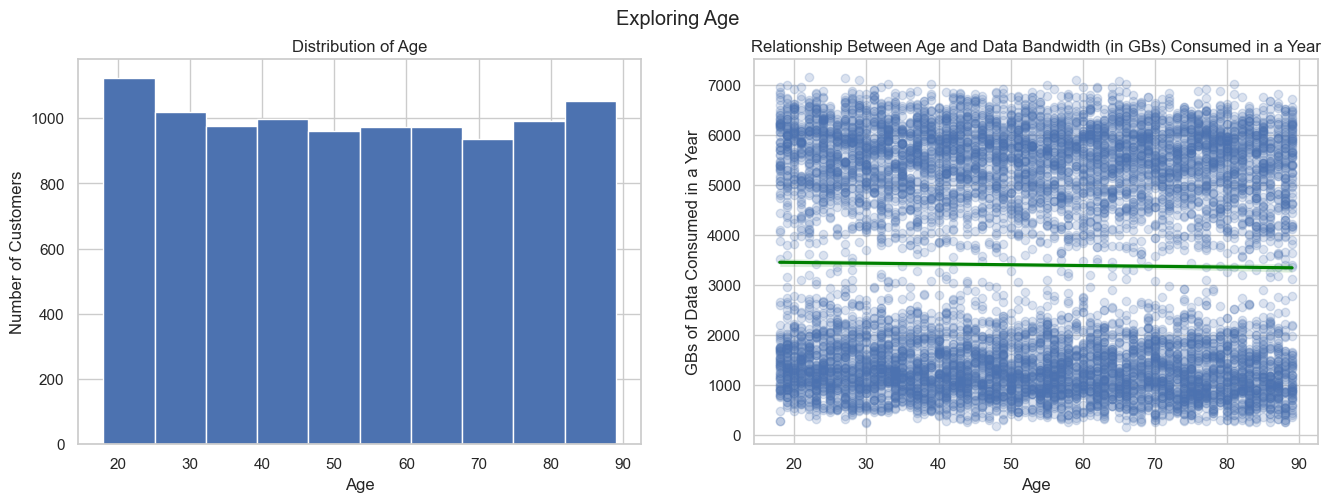

In [55]:
#Plots of Independent Variable 'Age' vs Dependent Variable 'Bandwidth_GB_Year'

plt.figure(figsize = [16,5])
plt.suptitle('Exploring Age')

# LEFT plot: Univariate exploration of Age
plt.subplot(1, 2, 1)
plt.title('Distribution of Age')
plt.hist(data=regression_df, x='Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers');



# RIGHT plot: Bivariate exploration of Outage_sec_perweek vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
plt.title('Relationship Between Age and Data Bandwidth (in GBs) Consumed in a Year')
sns.regplot(data=regression_df, x='Age', y='Bandwidth_GB_Year', 
                scatter_kws={'alpha':0.2}, line_kws={"color": "green"})
plt.xlabel('Age')
plt.ylabel('GBs of Data Consumed in a Year');

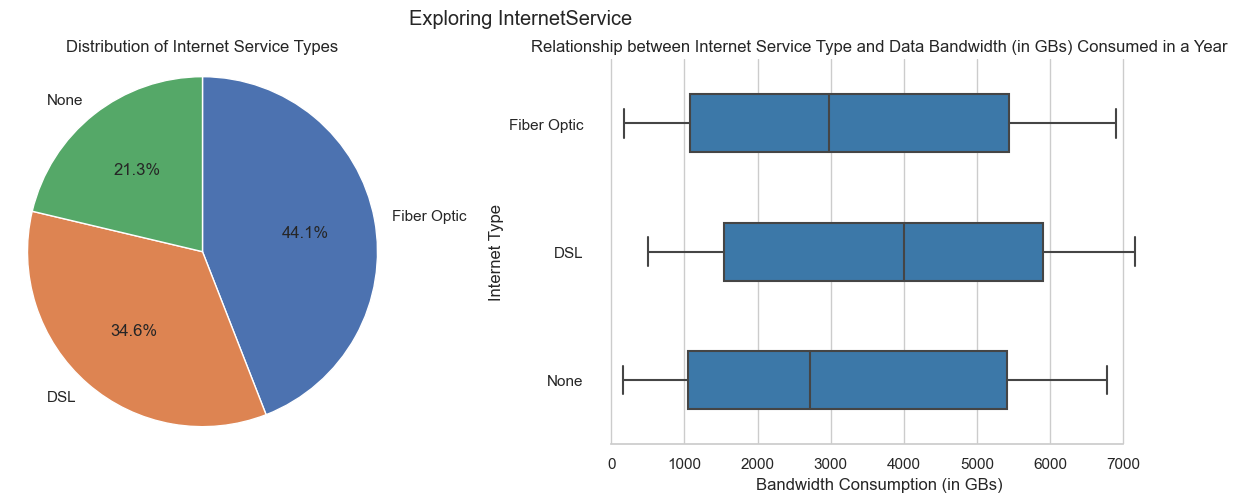

In [56]:
#Plots of Independent Variable 'InternetService' vs Dependent Variable 'Bandwidth_GB_Year'

color = sns.color_palette("Blues")[4]

plt.figure(figsize = [16,5])
plt.suptitle('Exploring InternetService')

# LEFT plot: Univariate exploration of InternetService
plt.subplot(1, 2, 1)
plt.title('Distribution of Internet Service Types')
Internet_Service_counts = df['InternetService'].value_counts()
plt.pie(Internet_Service_counts, labels=Internet_Service_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');


# RIGHT plot: Bivariate exploration of InternetService vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
g = sns.boxplot(x=regression_df.Bandwidth_GB_Year, y=df.InternetService, 
                color=color, width=.45)
g.xaxis.grid(True)
g.set(xlabel='Bandwidth Consumption (in GBs)', ylabel='Internet Type', title='Relationship between Internet Service Type and Data Bandwidth (in GBs) Consumed in a Year')
sns.despine(trim=True, left=True);


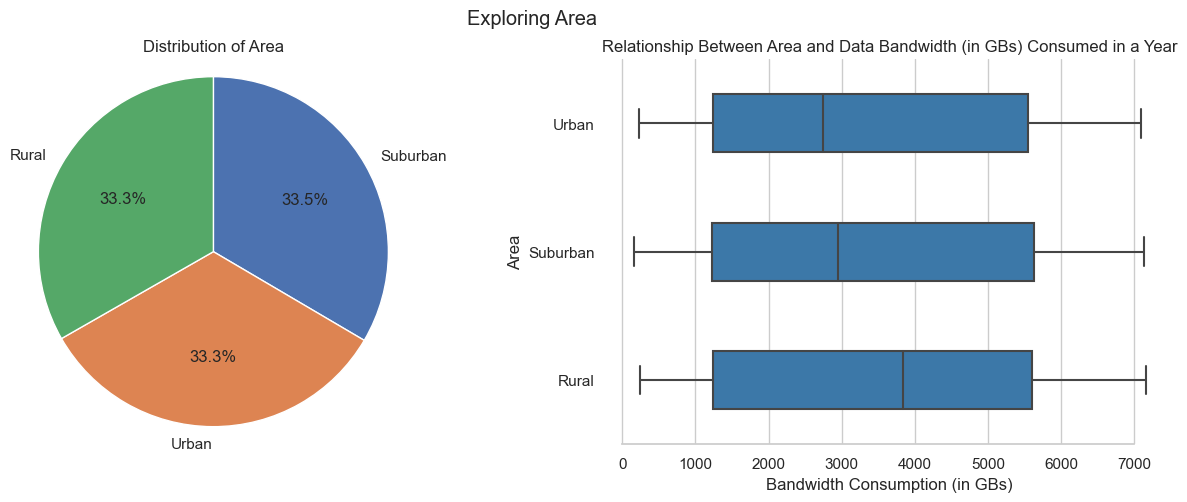

In [57]:
#Plots of Independent Variable 'Area' vs Dependent Variable 'Bandwidth_GB_Year'

color = sns.color_palette("Blues")[4]

plt.figure(figsize = [16,5])
plt.suptitle('Exploring Area')

# LEFT plot: Univariate exploration of Area
plt.subplot(1, 2, 1)
plt.title('Distribution of Area')
Area_counts = df['Area'].value_counts()
plt.pie(Area_counts, labels=Area_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# RIGHT plot: Bivariate exploration of Area vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
g = sns.boxplot(x=regression_df.Bandwidth_GB_Year, y=df.Area, 
                color=color, width=.45)
g.xaxis.grid(True)
g.set(xlabel='Bandwidth Consumption (in GBs)', ylabel='Area', title='Relationship Between Area and Data Bandwidth (in GBs) Consumed in a Year')
sns.despine(trim=True, left=True);



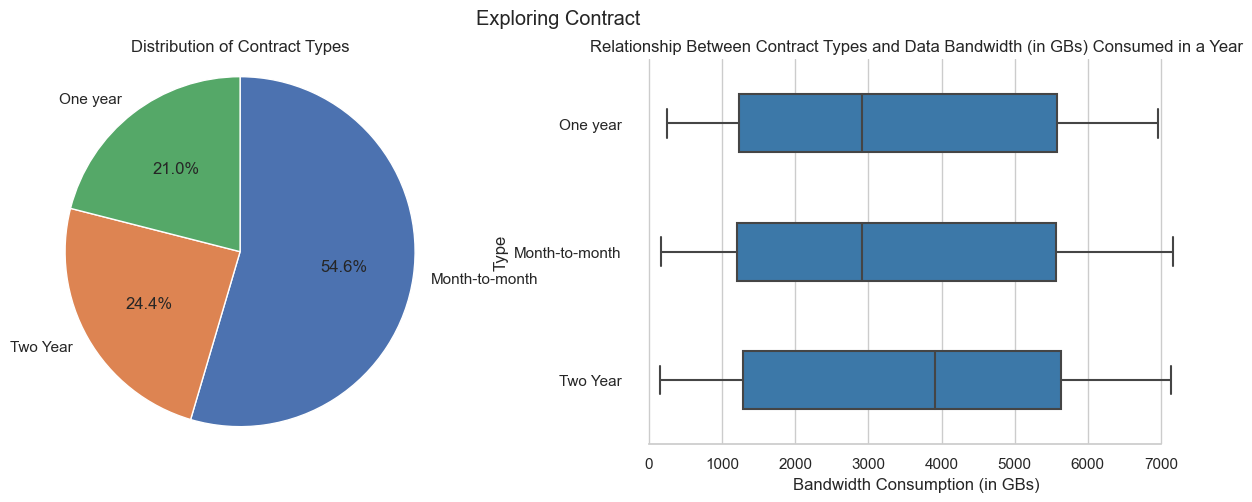

In [58]:
#Plots of Independent Variable 'Contract' vs Dependent Variable 'Bandwidth_GB_Year'

color = sns.color_palette("Blues")[4]

plt.figure(figsize = [16, 5])
plt.suptitle('Exploring Contract')

# LEFT plot: Univariate exploration of Contract
plt.subplot(1, 2, 1)
plt.title('Distribution of Contract Types')
Contract_counts = df['Contract'].value_counts()
plt.pie(Contract_counts, labels=Contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');


# RIGHT plot: Bivariate exploration of Contract vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
g = sns.boxplot(x=regression_df.Bandwidth_GB_Year, y=df.Contract, 
                color=color, width=.45)
g.xaxis.grid(True)
g.set(xlabel='Bandwidth Consumption (in GBs)', ylabel='Type', title='Relationship Between Contract Types and Data Bandwidth (in GBs) Consumed in a Year')
sns.despine(trim=True, left=True);



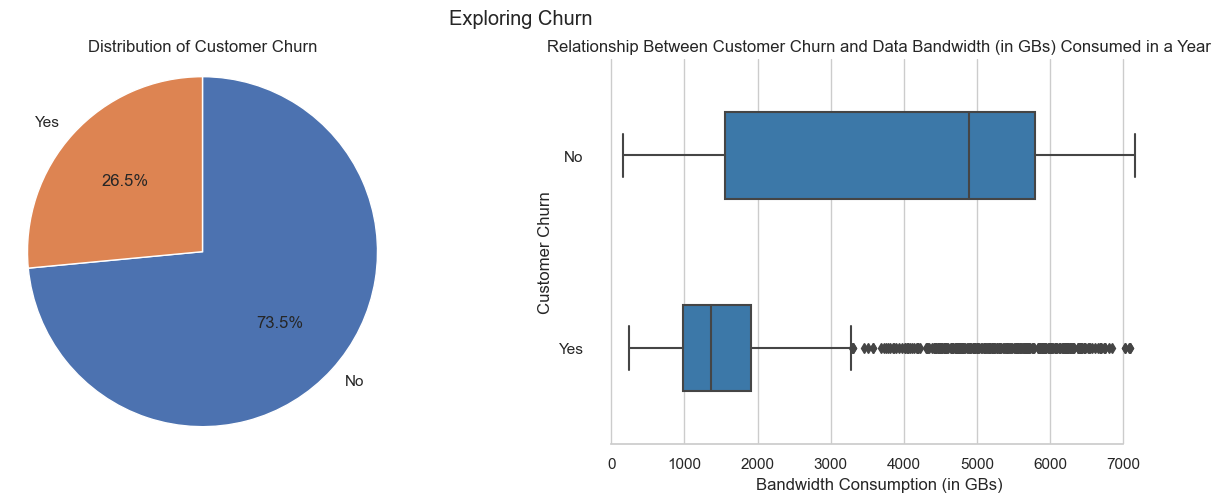

In [59]:
#Plots of Independent Variable 'Churn' vs Dependent Variable 'Bandwidth_GB_Year'

color = sns.color_palette("Blues")[4]

plt.figure(figsize = [16,5])
plt.suptitle('Exploring Churn')

# LEFT plot: Univariate exploration of Churn
plt.subplot(1, 2, 1)
plt.title('Distribution of Customer Churn')
Churn_counts = df['Churn'].value_counts()
plt.pie(Churn_counts, labels=Churn_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');


# RIGHT plot: Bivariate exploration of Churn vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
g = sns.boxplot(x=regression_df.Bandwidth_GB_Year, y=df.Churn, 
                color=color, width=.45)
g.xaxis.grid(True)
g.set(xlabel='Bandwidth Consumption (in GBs)', ylabel='Customer Churn', title='Relationship Between Customer Churn and Data Bandwidth (in GBs) Consumed in a Year')
sns.despine(trim=True, left=True);



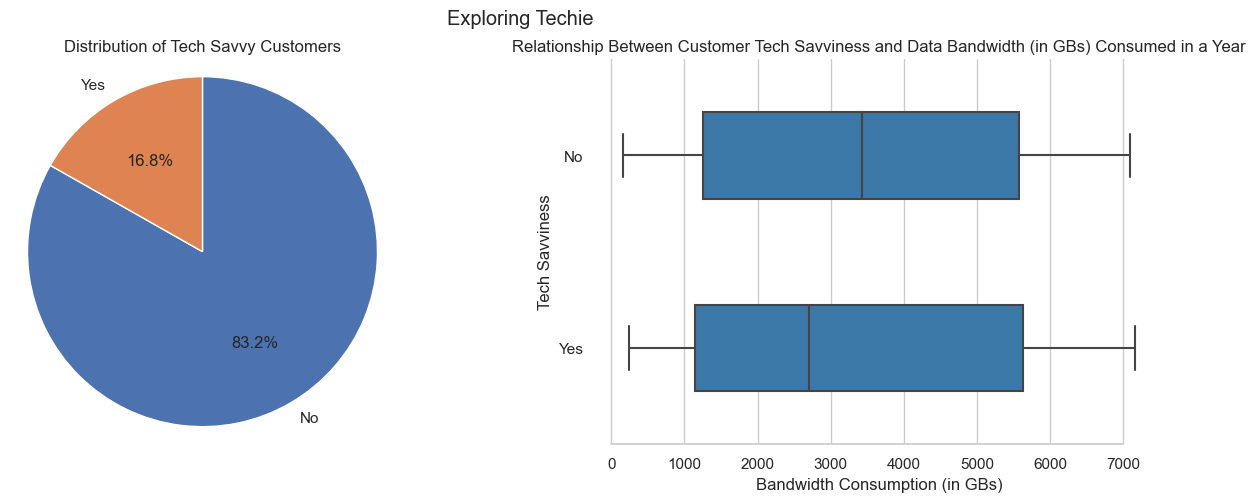

In [60]:
#Plots of Independent Variable 'Techie' vs Dependent Variable 'Bandwidth_GB_Year'

color = sns.color_palette("Blues")[4]

plt.figure(figsize = [16,5])
plt.suptitle('Exploring Techie')

# LEFT plot: Univariate exploration of Techie
plt.subplot(1, 2, 1)
plt.title('Distribution of Tech Savvy Customers')
Techie_counts = df['Techie'].value_counts()
plt.pie(Techie_counts, labels=Techie_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');


# RIGHT plot: Bivariate exploration of Techie vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
g = sns.boxplot(x=regression_df.Bandwidth_GB_Year, y=df.Techie, 
                color=color, width=.45)
g.xaxis.grid(True)
g.set(xlabel='Bandwidth Consumption (in GBs)', ylabel='Tech Savviness', title='Relationship Between Customer Tech Savviness and Data Bandwidth (in GBs) Consumed in a Year')
sns.despine(trim=True, left=True);



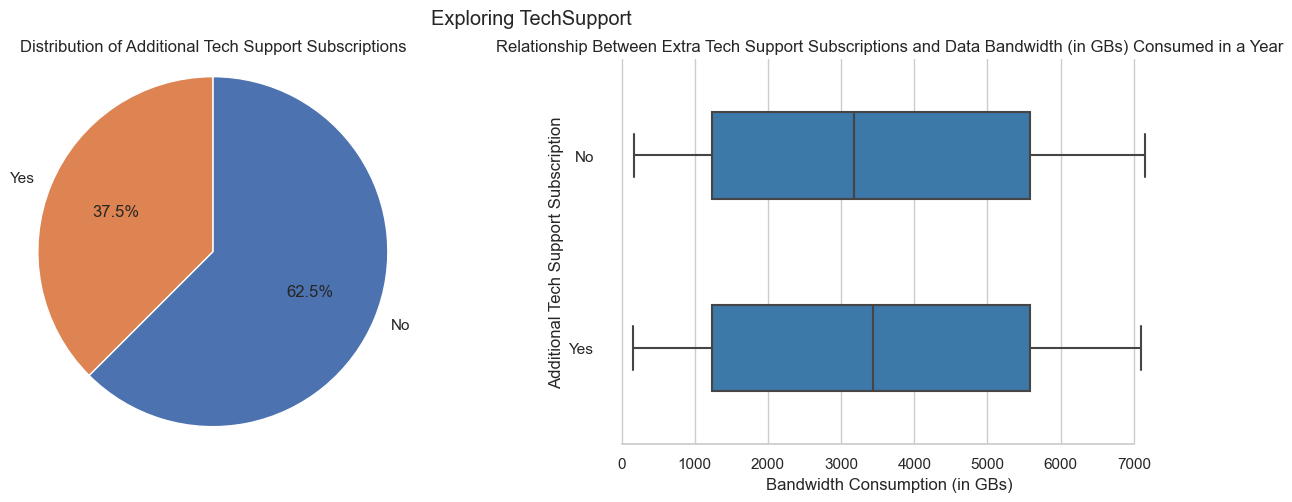

In [61]:
#Plots of Independent Variable 'TechSupport' vs Dependent Variable 'Bandwidth_GB_Year'

color = sns.color_palette("Blues")[4]

plt.figure(figsize = [16,5])
plt.suptitle('Exploring TechSupport')

# LEFT plot: Univariate exploration of TechSupport
plt.subplot(1, 2, 1)
plt.title('Distribution of Additional Tech Support Subscriptions')
TechSupport_counts = df['TechSupport'].value_counts()
plt.pie(TechSupport_counts, labels=TechSupport_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');


# RIGHT plot: Bivariate exploration of TechSupport vs Bandwidth_GB_Year
plt.subplot(1, 2, 2)
g = sns.boxplot(x=regression_df.Bandwidth_GB_Year, y=df.TechSupport, 
                color=color, width=.45)
g.xaxis.grid(True)
g.set(xlabel='Bandwidth Consumption (in GBs)', ylabel='Additional Tech Support Subscription', title='Relationship Between Extra Tech Support Subscriptions and Data Bandwidth (in GBs) Consumed in a Year')
sns.despine(trim=True, left=True);



In [62]:
#Convert datatypes with just the selected variables for Multiple Linear Regression

# Convert 'InternetService', 'Area', and 'Contract' columns to category from string
regression_df['InternetService'] = regression_df['InternetService'].astype('category')
regression_df['Area'] = regression_df['Area'].astype('category')
regression_df['Contract'] = regression_df['Contract'].astype('category')


#Establish boolean indexing
boolean_mapping = {'Yes' : 1, 'No' : 0}

#Then, convert 'Churn', 'Techie', and 'TechSupport' columns to booleans from string
regression_df['Churn'] = regression_df['Churn'].map(boolean_mapping)
regression_df['Techie'] = regression_df['Techie'].map(boolean_mapping)
regression_df['TechSupport'] = regression_df['TechSupport'].map(boolean_mapping)

regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Bandwidth_GB_Year   10000 non-null  float64 
 1   InternetService     10000 non-null  category
 2   Area                10000 non-null  category
 3   Contract            10000 non-null  category
 4   Churn               10000 non-null  int64   
 5   Techie              10000 non-null  int64   
 6   TechSupport         10000 non-null  int64   
 7   Income              10000 non-null  float64 
 8   Tenure              10000 non-null  float64 
 9   MonthlyCharge       10000 non-null  float64 
 10  Outage_sec_perweek  10000 non-null  float64 
 11  Population          10000 non-null  int64   
 12  Age                 10000 non-null  int64   
dtypes: category(3), float64(5), int64(5)
memory usage: 889.1 KB


C:\Users\neoka\AppData\Local\Temp\ipykernel_17492\16204988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['InternetService'] = regression_df['InternetService'].astype('category')
C:\Users\neoka\AppData\Local\Temp\ipykernel_17492\16204988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['Area'] = regression_df['Area'].astype('category')
C:\Users\neoka\AppData\Local\Temp\ipykernel_17492\16204988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [63]:
#Using Scikit-learn OneHotEncoder on nominal categorical variables


In [64]:
#Scikit-learn OneHotEncoding (OHE) on 'InternetService'

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")

ohetransform = ohe.fit_transform(regression_df[['InternetService']])

regression_df = pd.concat([regression_df,ohetransform],axis=1).drop(columns=['InternetService'])



In [65]:
#Scikit-learn OneHotEncoding (OHE) on 'Area'

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")

ohetransform = ohe.fit_transform(df[['Area']])

regression_df = pd.concat([regression_df,ohetransform],axis=1).drop(columns=['Area'])

In [66]:
#Scikit-learn OneHotEncoding (OHE) on 'Contract'

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")

ohetransform = ohe.fit_transform(regression_df[['Contract']])

regression_df = pd.concat([regression_df,ohetransform],axis=1).drop(columns=['Contract'])

In [67]:
# Save dataframe to CSV and ignore index 

regression_df.to_csv (r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D208\D208 PA Submission\churn_clean_regression.csv', index = False)

In [68]:
# Using RobustScaler to scale quantitative variables for MLR

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_data = regression_df

scaled_data = scaler.fit_transform(scaled_data)

scaled_data = pd.DataFrame(scaled_data, columns=regression_df.columns)

scaled_data.head()

Bandwidth_GB_Year  Churn  Techie  TechSupport    Income    Tenure  \
0          -0.546019    0.0     0.0          0.0 -0.135462 -0.534613   
1          -0.569826    1.0     1.0          0.0 -0.337018 -0.639889   
2          -0.281591    0.0     1.0          0.0 -0.692535 -0.367356   
3          -0.256331    0.0     1.0          0.0 -0.418717 -0.342468   
4          -0.691557    1.0     0.0          1.0  0.202919 -0.630288   

   MonthlyCharge  Outage_sec_perweek  Population       Age  \
0       0.081817           -0.516350   -0.231094  0.416667   
1       1.236890            0.425311    0.606235 -0.722222   
2      -0.124057            0.185824    0.066331 -0.083333   
3      -0.782281            1.238837    0.881134 -0.138889   
4      -0.288639           -0.473555    0.679123  0.833333   

   InternetService_Fiber Optic  InternetService_None  Area_Suburban  \
0                          1.0                   0.0            0.0   
1                          1.0                   0.0            0.0   
2                          0.0                   0.0            0.0   
3                          0.0                   0.0            1.0   
4                          1.0                   0.0            1.0   

   Area_Urban  Contract_One year  Contract_Two Year  
0         1.0                1.0                0.0  
1         1.0                0.0                0.0  
2         1.0                0.0                1.0  
3         0.0                0.0                1.0  
4         0.0                0.0                0.0

In [69]:
# Save scaled regression dataframe to CSV and ignore index 

scaled_data.to_csv (r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D208\D208 PA Submission\regression_scaled_data.csv', index = False)

In [70]:
# Check for VIF to see if variables should be eliminated due to high multicolinearity (VIF >10)
X = scaled_data[['Techie', 'Income', 'Tenure', 'MonthlyCharge', 'Outage_sec_perweek', 'Population', 'Age', 'InternetService_Fiber Optic', 'InternetService_None', 'Area_Suburban', 'Area_Urban', 'Contract_One year', 'Contract_Two Year']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        feature       VIF
0                        Techie  1.160974
1                        Income  1.044757
2                        Tenure  1.002486
3                 MonthlyCharge  1.123504
4            Outage_sec_perweek  1.001012
5                    Population  1.180983
6                           Age  1.000993
7   InternetService_Fiber Optic  1.764903
8          InternetService_None  1.353366
9                 Area_Suburban  1.518009
10                   Area_Urban  1.514385
11            Contract_One year  1.269622
12            Contract_Two Year  1.317328


In [71]:
#Primary/Initial model for Multiple Linear Regression

# Set dependent variable
y = scaled_data.Bandwidth_GB_Year

# Set multiple independent variables
X = scaled_data[['Techie', 'Income', 'Tenure', 'MonthlyCharge', 'Outage_sec_perweek', 'Population', 'Age', 'InternetService_Fiber Optic', 'InternetService_None', 'Area_Suburban', 'Area_Urban', 'Contract_One year', 'Contract_Two Year']].assign(const=1)


model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.929e+05
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:39:21   Log-Likelihood:                 23891.
No. Observations:               10000   AIC:                        -4.775e+04
Df Residuals:                    9986   BIC:                        -4.765e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Techie            

In [72]:
#Calculate Initial Model Residual Standard Error

results.resid.std(ddof=X.shape[1])

0.022207159055198235

In [73]:
#Using forward selection to get most statistically significant features
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
            
        min_p_value = new_pval.min()
        
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    
    return best_features

selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

C:\Users\neoka\AppData\Local\Temp\ipykernel_17492\624994402.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\neoka\AppData\Local\Temp\ipykernel_17492\624994402.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\neoka\AppData\Local\Temp\ipykernel_17492\624994402.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\neoka\AppData\Local\Temp\ipykernel_17492\624994402.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future versio

Selected features: ['Tenure', 'MonthlyCharge', 'InternetService_Fiber Optic', 'InternetService_None', 'const', 'Age']


C:\Users\neoka\AppData\Local\Temp\ipykernel_17492\624994402.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\neoka\AppData\Local\Temp\ipykernel_17492\624994402.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


In [74]:
#Reduced Model for Multiple Linear Regression. Features with p-values < alpha of 0.05 kept

#Retained only the Selected features

# Set dependent variable
y = scaled_data.Bandwidth_GB_Year

# Set multiple independent variables
X = scaled_data[['Tenure', 'MonthlyCharge', 'Age', 'InternetService_Fiber Optic', 'InternetService_None']]

# adding constant to independent variables
X = sm.add_constant(X)

# Fitting the reduced model
reduced_model = sm.OLS(y, X)
reduced_results = reduced_model.fit()

print(reduced_results.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.022e+06
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:39:22   Log-Likelihood:                 23887.
No. Observations:               10000   AIC:                        -4.776e+04
Df Residuals:                    9994   BIC:                        -4.772e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [75]:
#Calculate Reduced Model Residual Standard Error

reduced_results.resid.std(ddof=X.shape[1])

0.02220699004592886

In [76]:
# All p-values for independent variables are < 0.05, this is the final reduced model

# Set dependent variable
y = scaled_data.Bandwidth_GB_Year

# Set multiple independent variables
X = scaled_data[['Tenure', 'MonthlyCharge', 'Age', 'InternetService_Fiber Optic', 'InternetService_None']]

# adding constant to independent variables
X = sm.add_constant(X)

# Fitting the reduced model
reduced_model = sm.OLS(y, X)
reduced_results = reduced_model.fit()

print(reduced_results.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.022e+06
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:39:22   Log-Likelihood:                 23887.
No. Observations:               10000   AIC:                        -4.776e+04
Df Residuals:                    9994   BIC:                        -4.772e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [77]:
#Calculate Reduced Model Residual Standard Error

reduced_results.resid.std(ddof=X.shape[1])

0.02220699004592886

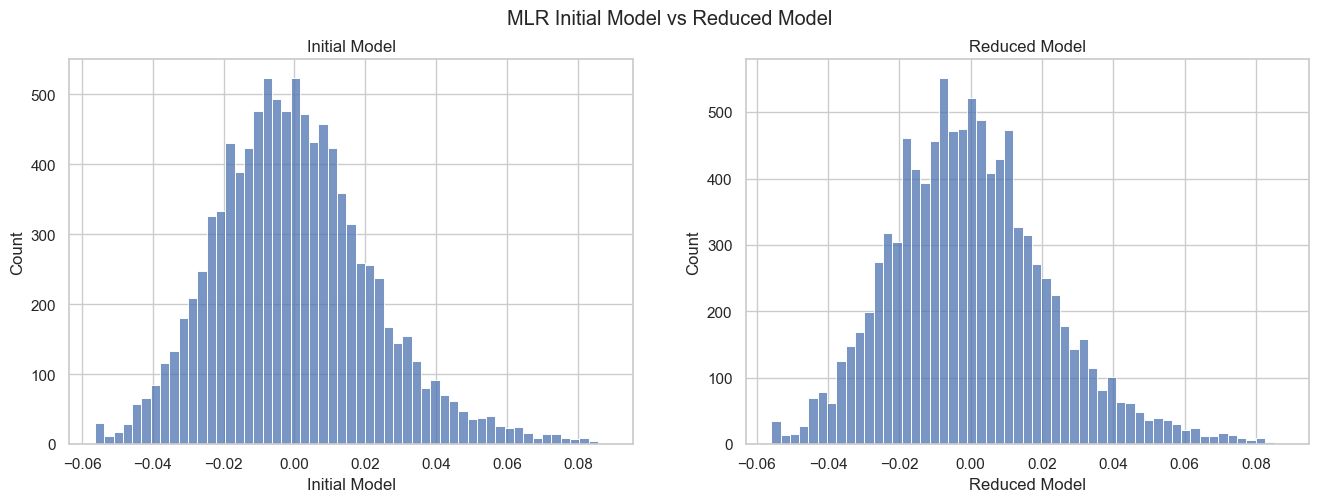

In [78]:
#Residual Plot (Histograms) for Initial Model vs Reduced Model

plt.figure(figsize = [16,5])
plt.suptitle('MLR Initial Model vs Reduced Model')


plt.subplot(1, 2, 1)
plt.title('Initial Model')
ax = sns.histplot(x=results.resid)
ax.set(xlabel='Initial Model');


plt.subplot(1, 2, 2)
plt.title('Reduced Model')
ax = sns.histplot(x=reduced_results.resid)
ax.set(xlabel='Reduced Model');


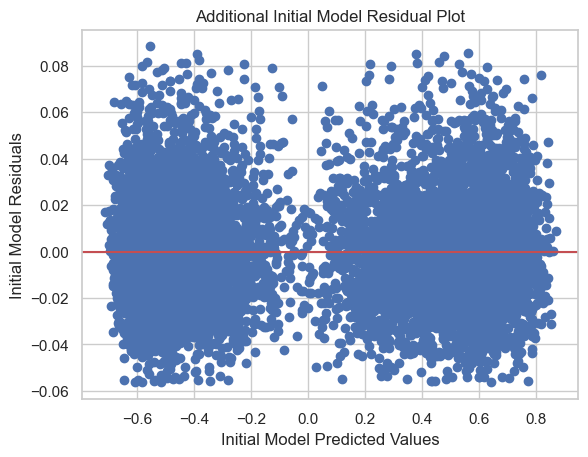

In [79]:
#Additional residual plot (regression plot) for Initial Model 

# Define the predictor variables
X = X = scaled_data[['Techie', 'Income', 'Tenure', 'MonthlyCharge', 'Outage_sec_perweek', 'Population', 'Age', 'InternetService_Fiber Optic', 'InternetService_None', 'Area_Suburban', 'Area_Urban', 'Contract_One year', 'Contract_Two Year']]
y = scaled_data.Bandwidth_GB_Year
# Fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()
# Generate the predicted values
y_pred = model.predict(sm.add_constant(X))
# Calculate the residuals
residuals = y - y_pred
# Create the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Initial Model Predicted Values')
plt.ylabel('Initial Model Residuals')
plt.title('Additional Initial Model Residual Plot')
plt.show()

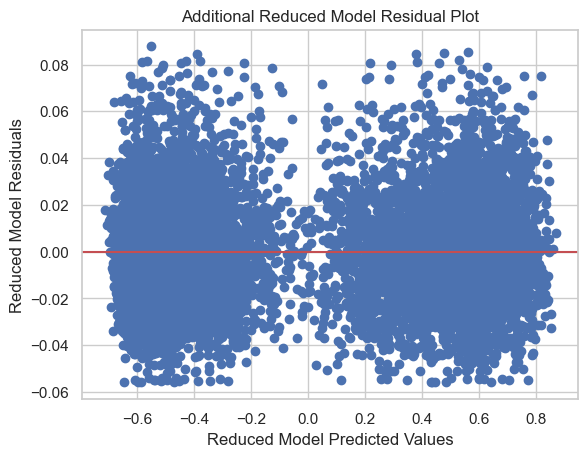

In [80]:
#Additional residual plot (regression plot) for Reduced Model 

# Define the predictor variables
X = scaled_data[['Tenure', 'MonthlyCharge', 'Age', 'InternetService_Fiber Optic', 'InternetService_None']]
y = scaled_data.Bandwidth_GB_Year
# Fit the model
reduced_model = sm.OLS(y, sm.add_constant(X)).fit()
# Generate the predicted values
reduced_y_pred = reduced_model.predict(sm.add_constant(X))
# Calculate the residuals
reduced_residuals = y - reduced_y_pred
# Create the residual plot
plt.scatter(reduced_y_pred, reduced_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Reduced Model Predicted Values')
plt.ylabel('Reduced Model Residuals')
plt.title('Additional Reduced Model Residual Plot')
plt.show()

In [81]:
#Independent variable coefficients for Initial Model

results.params

Techie                        -0.000604
Income                        -0.000178
Tenure                         1.008668
MonthlyCharge                  0.056995
Outage_sec_perweek             0.000258
Population                    -0.000043
Age                           -0.027968
InternetService_Fiber Optic   -0.113543
InternetService_None          -0.082640
Area_Suburban                 -0.000056
Area_Urban                    -0.000379
Contract_One year              0.000656
Contract_Two Year              0.001159
const                          0.105731
dtype: float64

In [82]:
#Independent variable coefficients for Reduced Model

reduced_results.params

const                          0.105842
Tenure                         1.008695
MonthlyCharge                  0.057005
Age                           -0.027980
InternetService_Fiber Optic   -0.113537
InternetService_None          -0.082630
dtype: float64

In [83]:
#Perform White's test on Initial Model
from statsmodels.stats.diagnostic import het_white

white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 133.05144384358258, 'Test Statistic p-value': 0.005006395948027424, 'F-Statistic': 1.4208994761654905, 'F-Test p-value': 0.004812137362786905}


In [84]:
#Perform White's test on Reduced Model
from statsmodels.stats.diagnostic import het_white

white_test = het_white(reduced_model.resid,  reduced_model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 45.045708232446245, 'Test Statistic p-value': 0.0002397220145432872, 'F-Statistic': 2.6569464007432613, 'F-Test p-value': 0.0002352953316535394}


In [85]:
#Residual Plots for each Independent Variable retained in the Final/Reduced Model

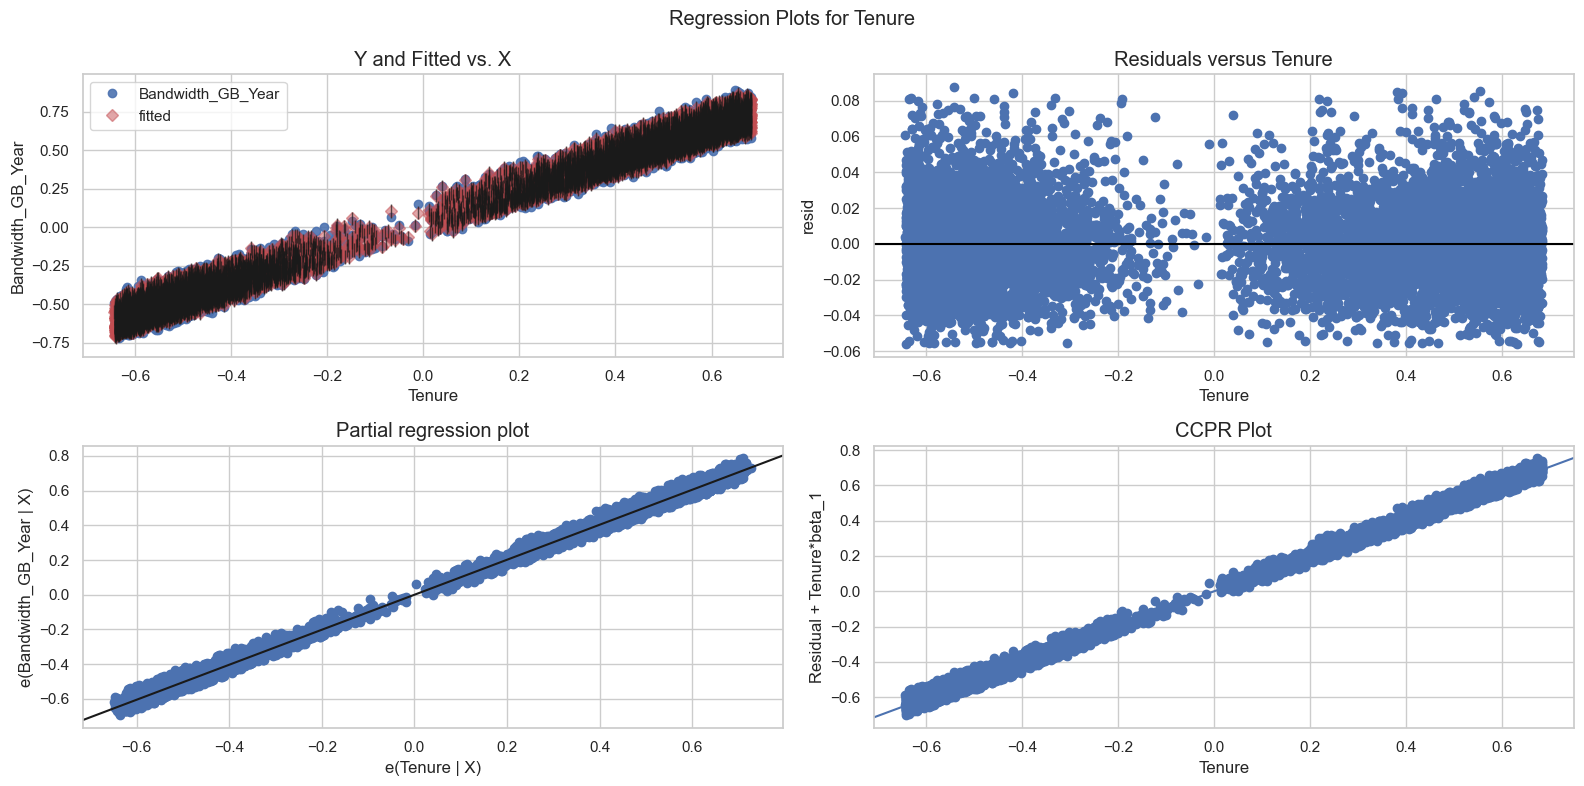

In [86]:
# Residual plot for 'Tenure'
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(reduced_results, 'Tenure', fig=fig);

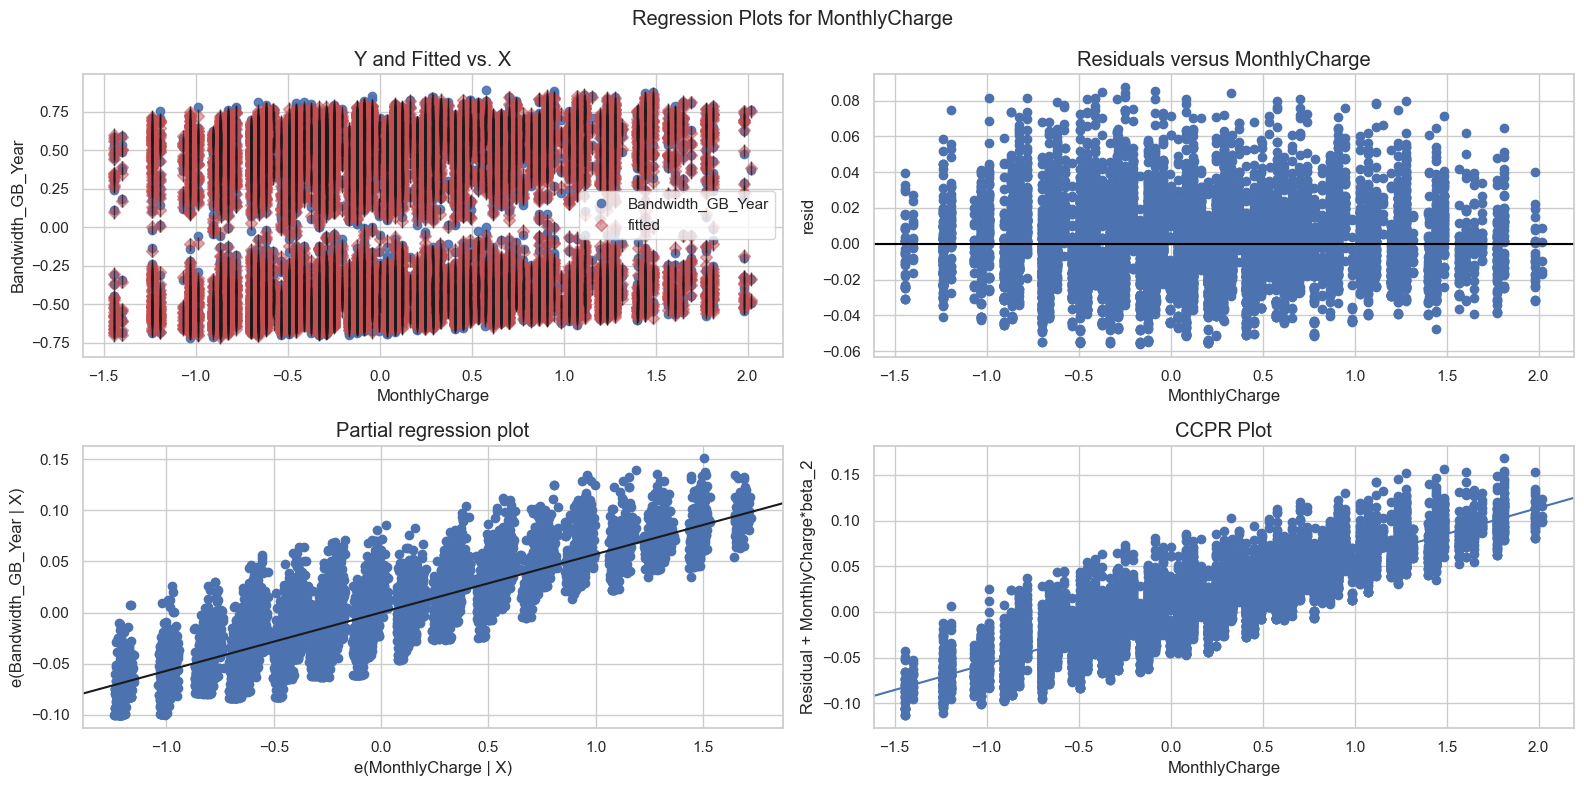

In [87]:
# Residual plot for 'MonthlyCharge'
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(reduced_results, 'MonthlyCharge', fig=fig);

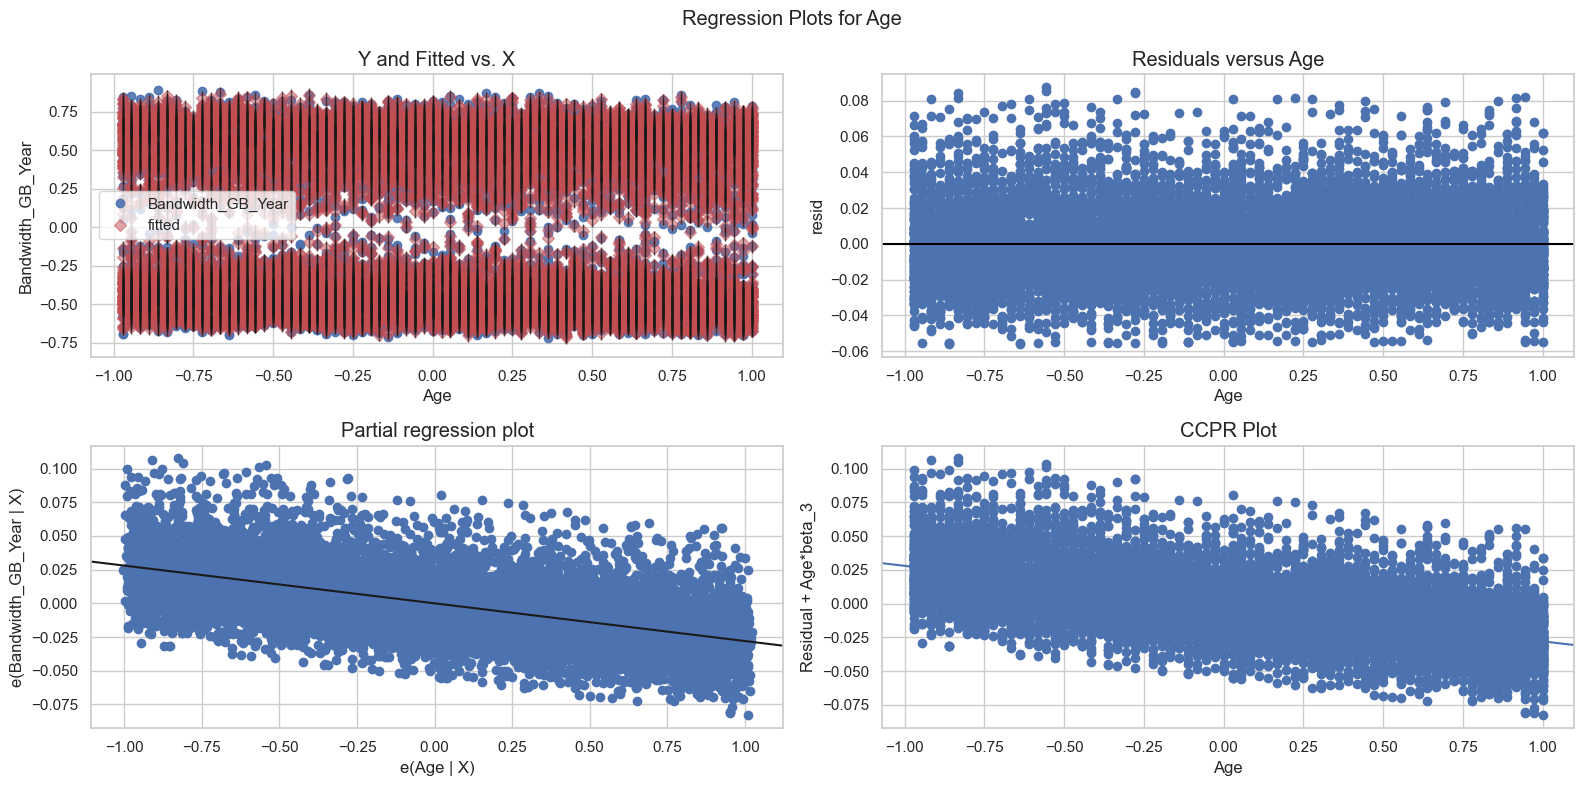

In [88]:
# Residual plot for 'Age'
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(reduced_results, 'Age', fig=fig);

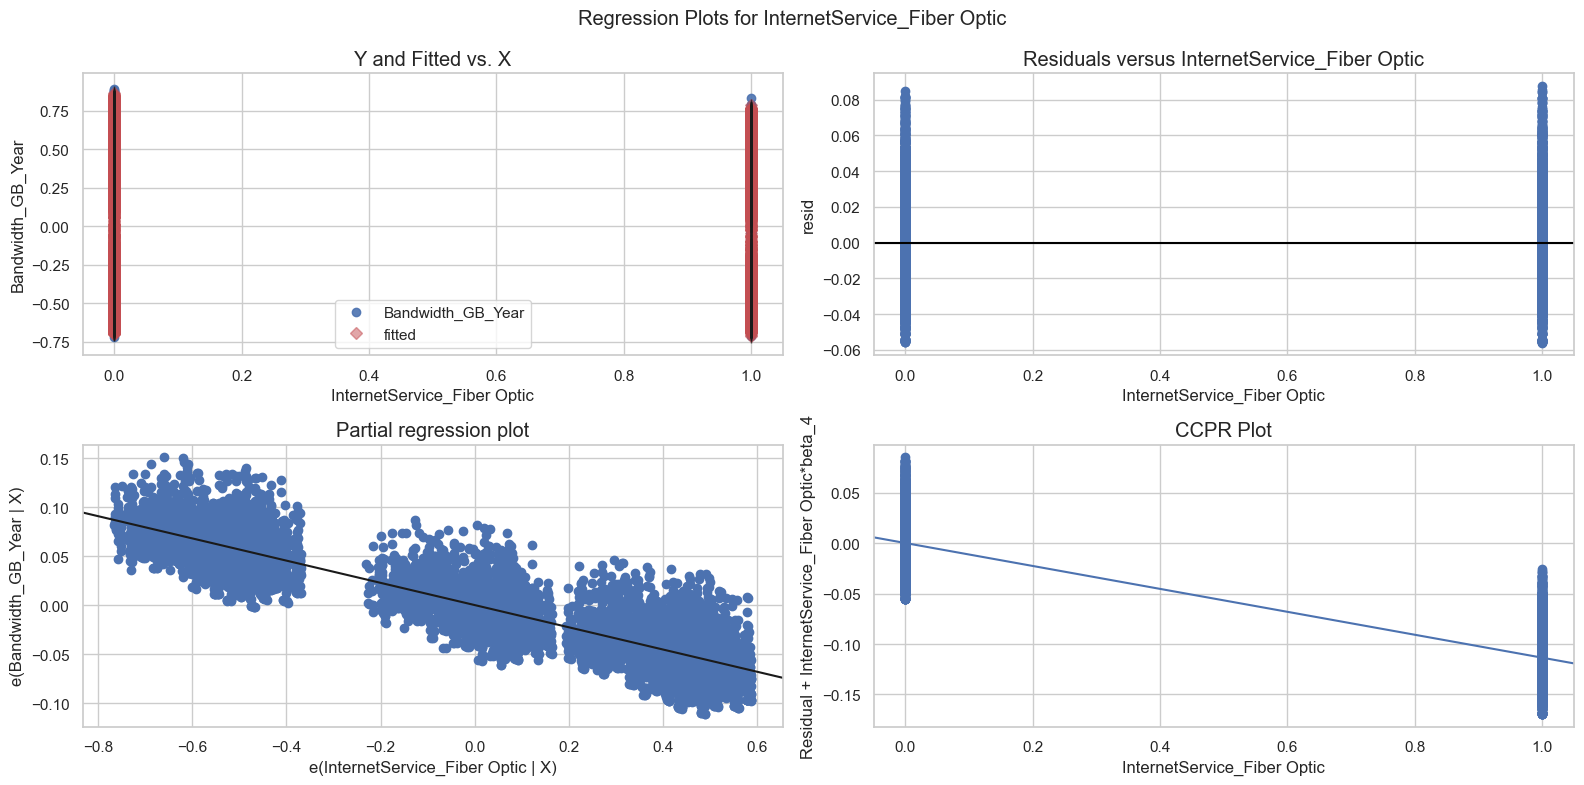

In [89]:
# Residual plot for 'InternetService_Fiber Optic'
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(reduced_results, 'InternetService_Fiber Optic', fig=fig);

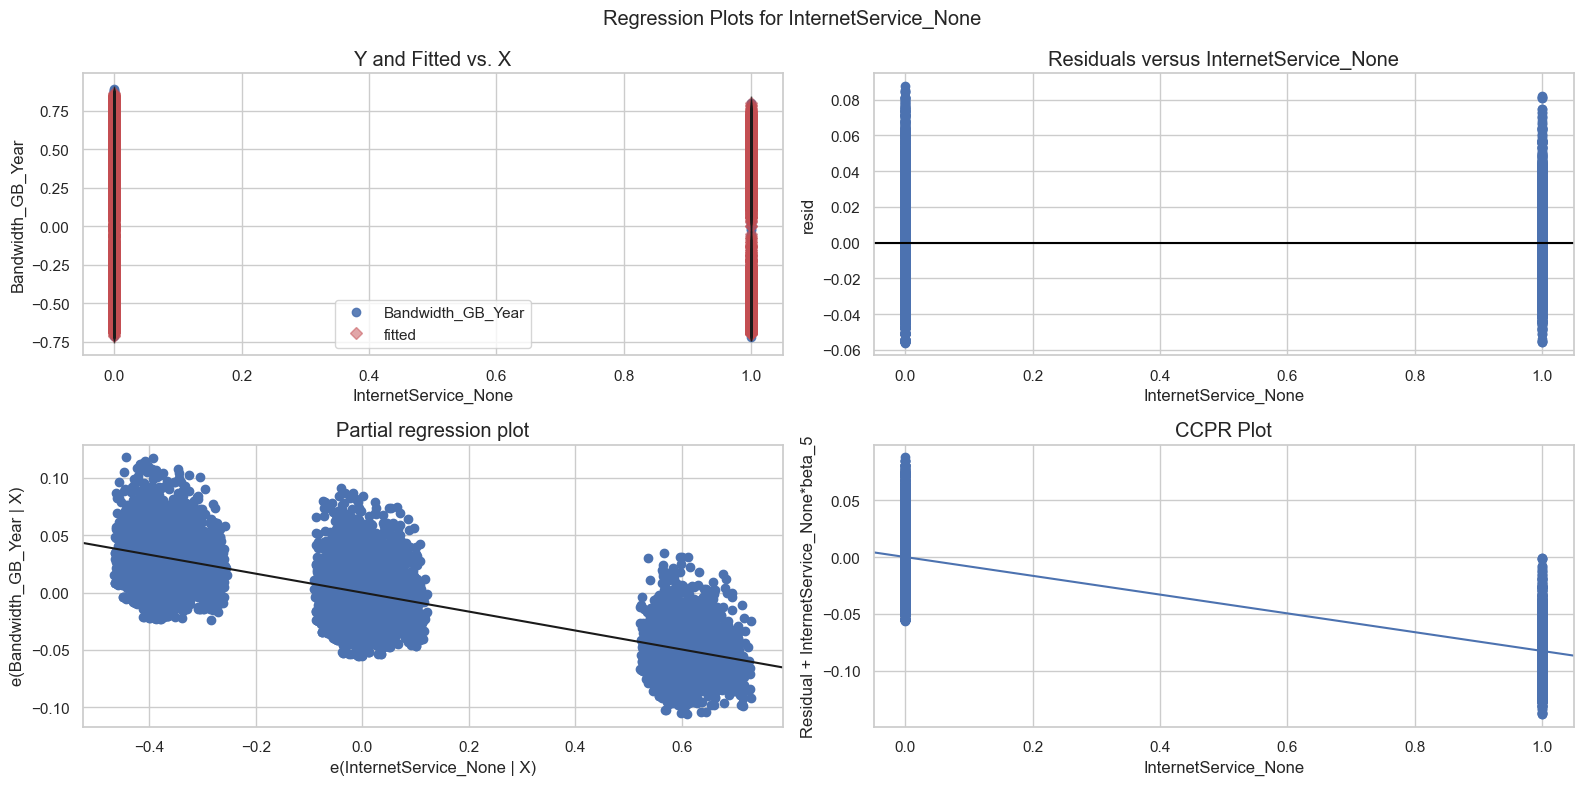

In [90]:
# Residual plot for 'InternetService_None'
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(reduced_results, 'InternetService_None', fig=fig);